In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("C:\\Users\\kaushik\\Desktop\\ML\\Loan Prediction\\train.csv")

In [4]:
datamain=pd.read_csv("C:\\Users\\kaushik\\Desktop\\ML\\Loan Prediction\\train.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
data['Gender'].dtype

dtype('O')

In [7]:
for i in data.columns:
    if data[i].dtype=='O':
        print("no of unique columns of {} is {}".format(i,data[i].nunique()))

no of unique columns of Loan_ID is 614
no of unique columns of Gender is 2
no of unique columns of Married is 2
no of unique columns of Dependents is 4
no of unique columns of Education is 2
no of unique columns of Self_Employed is 2
no of unique columns of Property_Area is 3
no of unique columns of Loan_Status is 2


In [8]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [9]:
data=data.dropna(axis=0, subset=['Gender'])
data['Credit_History'].fillna(value=data['Credit_History'].median(),inplace=True)

In [10]:
data2=data

In [11]:
from sklearn.preprocessing import LabelEncoder
lblencdr=LabelEncoder()

In [12]:
data2.dropna(axis=0,inplace=True)

In [13]:
for i in data.columns:
    if data2[i].dtype=='O':
        data2[i]=lblencdr.fit_transform(data2[i])

In [14]:
for i in data2.columns:
    print("no of unique columns of {} is {}".format(i,data[i].nunique()))

no of unique columns of Loan_ID is 523
no of unique columns of Gender is 2
no of unique columns of Married is 2
no of unique columns of Dependents is 4
no of unique columns of Education is 2
no of unique columns of Self_Employed is 2
no of unique columns of ApplicantIncome is 436
no of unique columns of CoapplicantIncome is 255
no of unique columns of LoanAmount is 194
no of unique columns of Loan_Amount_Term is 10
no of unique columns of Credit_History is 2
no of unique columns of Property_Area is 3
no of unique columns of Loan_Status is 2


In [15]:
data2.drop('Loan_ID',axis=1,inplace=True)

In [16]:
cat_columns_idx = data2.columns.get_loc('Property_Area') 

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
onehotencoder=OneHotEncoder(categorical_features = [10])

In [19]:
dfnew=onehotencoder.fit_transform(data2).toarray()

In [20]:
dfnew=dfnew[:,1:]

In [21]:
column_nm=['Property_area1','Property_area2','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status']

In [22]:
dfnew1=pd.DataFrame(dfnew,columns=column_nm)

In [23]:
dfnew1.corr()

Property_area1  Property_area2    Gender   Married  \
Property_area1           1.000000       -0.545084 -0.104925  0.007792   
Property_area2          -0.545084        1.000000  0.056190  0.018191   
Gender                  -0.104925        0.056190  1.000000  0.350681   
Married                  0.007792        0.018191  0.350681  1.000000   
Dependents              -0.008452        0.001994  0.218128  0.373178   
Education               -0.020342       -0.037392  0.062914  0.010541   
Self_Employed           -0.013889       -0.020481 -0.011238 -0.012624   
ApplicantIncome         -0.001419       -0.033713  0.043832  0.030374   
CoapplicantIncome       -0.015785        0.007716  0.158797  0.110750   
LoanAmount               0.007275       -0.068496  0.111836  0.160488   
Loan_Amount_Term         0.043406       -0.070877 -0.093875 -0.112045   
Credit_History           0.039546       -0.023152  0.016697  0.032750   
Loan_Status              0.129673       -0.025037  0.036330  0.114309   

                   Dependents  Education  Self_Employed  ApplicantIncome  \
Property_area1      -0.008452  -0.020342      -0.013889        -0.001419   
Property_area2       0.001994  -0.037392      -0.020481        -0.033713   
Gender               0.218128   0.062914      -0.011238         0.043832   
Married              0.373178   0.010541      -0.012624         0.030374   
Dependents           1.000000   0.058805       0.053819         0.121762   
Education            0.058805   1.000000      -0.001953        -0.132307   
Self_Employed        0.053819  -0.001953       1.000000         0.169267   
ApplicantIncome      0.121762  -0.132307       0.169267         1.000000   
CoapplicantIncome   -0.015662  -0.079528      -0.017497        -0.101450   
LoanAmount           0.142992  -0.168406       0.133958         0.515906   
Loan_Amount_Term    -0.096134  -0.087290      -0.035395        -0.000025   
Credit_History      -0.029628  -0.045159      -0.022220        -0.057972   
Loan_Status          0.023213  -0.063471      -0.030614        -0.043445   

                   CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Property_area1             -0.015785    0.007275          0.043406   
Property_area2              0.007716   -0.068496         -0.070877   
Gender                      0.158797    0.111836         -0.093875   
Married                     0.110750    0.160488         -0.112045   
Dependents                 -0.015662    0.142992         -0.096134   
Education                  -0.079528   -0.168406         -0.087290   
Self_Employed              -0.017497    0.133958         -0.035395   
ApplicantIncome            -0.101450    0.515906         -0.000025   
CoapplicantIncome           1.000000    0.192040         -0.008410   
LoanAmount                  0.192040    1.000000          0.076697   
Loan_Amount_Term           -0.008410    0.076697          1.000000   
Credit_History             -0.004826   -0.033974          0.030693   
Loan_Status                -0.046825   -0.061889         -0.016902   

                   Credit_History  Loan_Status  
Property_area1           0.039546     0.129673  
Property_area2          -0.023152    -0.025037  
Gender                   0.016697     0.036330  
Married                  0.032750     0.114309  
Dependents              -0.029628     0.023213  
Education               -0.045159    -0.063471  
Self_Employed           -0.022220    -0.030614  
ApplicantIncome         -0.057972    -0.043445  
CoapplicantIncome       -0.004826    -0.046825  
LoanAmount              -0.033974    -0.061889  
Loan_Amount_Term         0.030693    -0.016902  
Credit_History           1.000000     0.517013  
Loan_Status              0.517013     1.000000

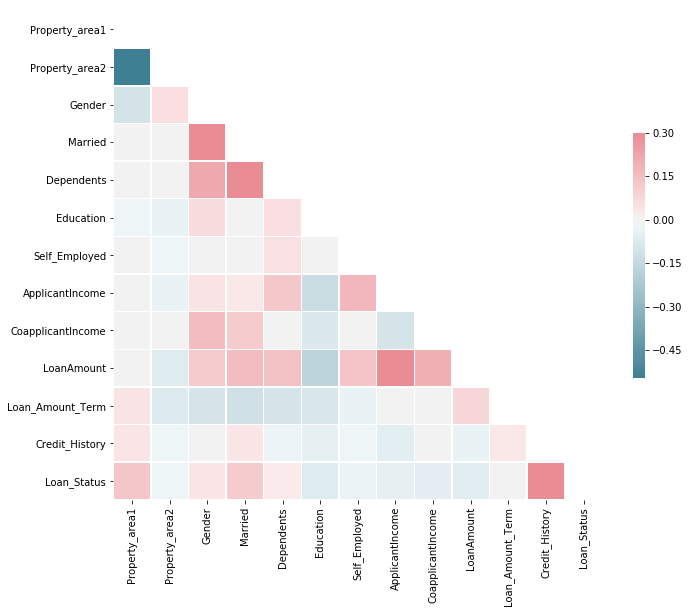

In [23]:
# Compute the correlation matrix
corr = dfnew1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [100]:
X = dfnew1.iloc[:, :-1]
Y=dfnew1.iloc[:,-1:]

In [26]:
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [28]:
kfold = StratifiedKFold(n_splits=3, random_state=7)

In [29]:
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 79.73% (0.30%)


C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

In [ ]:
sclr=StandardScaler()
X=sclr.fit_transform(X)

In [60]:
from sklearn.cross_validation import train_test_split

In [61]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,Y, test_size=0.20, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rbc=RandomForestClassifier()

In [51]:
rbc.fit(X_train,y_train)

C:\Users\kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
pred=rbc.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

        0.0       0.63      0.50      0.56        34
        1.0       0.78      0.86      0.82        71

avg / total       0.73      0.74      0.73       105



In [45]:
from sklearn.preprocessing import StandardScaler

array([[-0.80290354, -0.67889164,  0.47415647, ..., -0.21030553,
         0.27406421,  0.39309717],
       [-0.80290354,  1.47298913,  0.47415647, ..., -0.95599902,
         0.27406421,  0.39309717],
       [-0.80290354,  1.47298913,  0.47415647, ..., -0.30652404,
         0.27406421,  0.39309717],
       ...,
       [-0.80290354,  1.47298913,  0.47415647, ...,  1.29310878,
         0.27406421,  0.39309717],
       [-0.80290354,  1.47298913,  0.47415647, ...,  0.49930602,
         0.27406421,  0.39309717],
       [ 1.24547963, -0.67889164, -2.10900846, ..., -0.15016895,
         0.27406421, -2.54390027]])

In [57]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label= y_train)

In [58]:
params = {}
params['learning_rate']= 0.003
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss'
params['sub_feature']=0.5
params['num_leaves']= 10
params['min_data']=50
params['max_depth']=10

In [60]:
clf= lgb.train(params, d_train, 100)

In [66]:
y_pred = clf.predict(X_test)
       
            

In [74]:
for i in range(0,105):
    if (y_pred[i] >= 0.5):
        y_pred[i] = 1
    else:
        y_pred[i] =0
len(y_pred) 

105

In [75]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        34
        1.0       0.68      1.00      0.81        71

avg / total       0.46      0.68      0.55       105



C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
y_pred.nunique()

AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

In [78]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, y_test)
accuracy

0.7428571428571429

In [101]:
modelxgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)

In [102]:
from sklearn.model_selection import StratifiedKFold 
kf = StratifiedKFold(n_splits=5,random_state=None) 

In [103]:
for k_fold,(train_index, test_index) in enumerate(kf.split(X,Y)):
      #print("Train:", train_index, "Validation:",test_index)
      print("for fold {}  accurancy is".format(k_fold))
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
      modelxgb.fit(X_train,y_train)
      print(modelxgb.score(X_test,y_test))

for fold 0  accurancy is
0.8018867924528302
for fold 1  accurancy is
0.780952380952381
for fold 2  accurancy is
0.7788461538461539
for fold 3  accurancy is
0.8557692307692307
for fold 4  accurancy is


C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

0.7788461538461539


In [104]:
modelxgb.score(X_test1,y_test1)

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.819047619047619

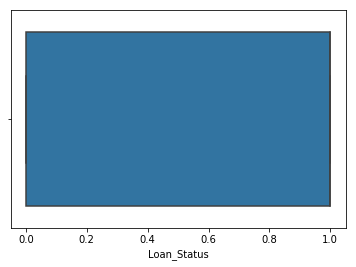

In [79]:
#Oulier detection - Univarite - Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=dfnew1['Loan_Status'])

In [77]:
dfnew1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 13 columns):
Property_area1       523 non-null float64
Property_area2       523 non-null float64
Gender               523 non-null float64
Married              523 non-null float64
Dependents           523 non-null float64
Education            523 non-null float64
Self_Employed        523 non-null float64
ApplicantIncome      523 non-null float64
CoapplicantIncome    523 non-null float64
LoanAmount           523 non-null float64
Loan_Amount_Term     523 non-null float64
Credit_History       523 non-null float64
Loan_Status          523 non-null float64
dtypes: float64(13)
memory usage: 53.2 KB


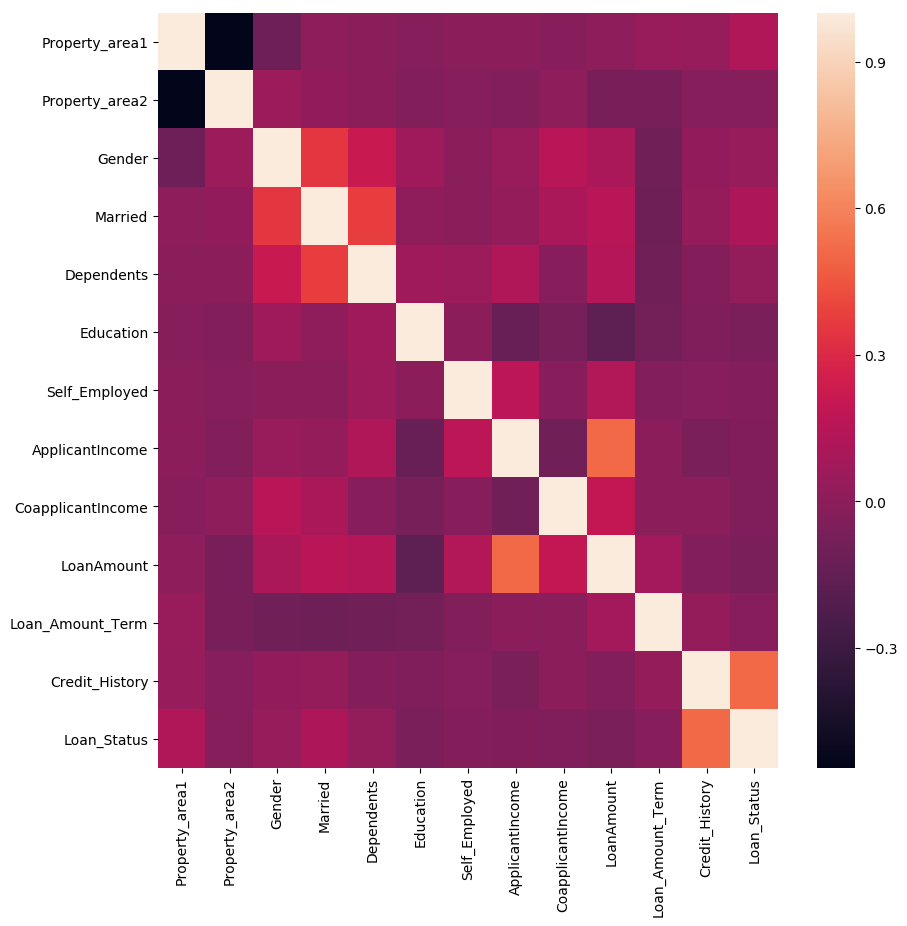

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(dfnew1.corr())

In [80]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dfnew1))
print(z)

[[0.80290354 0.67889164 0.47415647 ... 0.27406421 0.39309717 1.53380706]
 [0.80290354 1.47298913 0.47415647 ... 0.27406421 0.39309717 0.65197248]
 [0.80290354 1.47298913 0.47415647 ... 0.27406421 0.39309717 0.65197248]
 ...
 [0.80290354 1.47298913 0.47415647 ... 0.27406421 0.39309717 0.65197248]
 [0.80290354 1.47298913 0.47415647 ... 0.27406421 0.39309717 0.65197248]
 [1.24547963 0.67889164 2.10900846 ... 0.27406421 2.54390027 1.53380706]]


In [91]:
z.shape

(523, 13)

In [92]:
threshold = 3
print(np.where(z > 3))

(array([  8,  12,  56,  80, 104, 107, 129, 129, 147, 147, 153, 155, 202,
       222, 237, 262, 267, 311, 340, 347, 354, 375, 412, 420, 422, 431,
       446, 447, 466, 479, 492, 496, 500, 514], dtype=int64), array([ 8, 10, 10, 10,  9, 10,  7,  9,  8,  9,  7,  7, 10, 10,  9,  9, 10,
        9,  8,  7,  8,  7,  9, 10, 10,  9,  9,  9, 10,  9, 10,  8, 10,  9],
      dtype=int64))


In [93]:
dfnewout=dfnew1
dfnewout = dfnewout[(z < 3).all(axis=1)]

In [94]:
dfnewout.shape

(491, 13)

In [225]:
X = dfnew1.iloc[:, :-1]
Y=dfnew1.iloc[:,-1:]

In [226]:
for k_fold,(train_index, test_index) in enumerate(kf.split(X,Y)):
      #print("Train:", train_index, "Validation:",test_index)
      print("for fold {}  accurancy is".format(k_fold))
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
      modelxgb.fit(X_train,y_train)
      print(modelxgb.score(X_test,y_test))

for fold 0  accurancy is
0.8018867924528302
for fold 1  accurancy is
0.780952380952381
for fold 2  accurancy is
0.7788461538461539
for fold 3  accurancy is
0.8557692307692307
for fold 4  accurancy is


C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

0.7788461538461539


C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [227]:
modelxgb.score(X_test1,y_test1)

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.819047619047619

In [25]:
#preparing the test dataset
datatest=pd.read_csv("C:\\Users\\kaushik\\Desktop\\ML\\Loan Prediction\\test.csv")
data=pd.read_csv("C:\\Users\\kaushik\\Desktop\\ML\\Loan Prediction\\train.csv")

In [26]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [24]:
datatest['Credit_History'].fillna(value=datatest['Credit_History'].median(),inplace=True)


NameError: name 'datatest' is not defined

In [192]:
datatest1=datatest.drop('Loan_ID',axis=1)

In [193]:
datatest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 31.6+ KB


10

In [194]:
datatest1['Gender'].fillna(datatest1['Gender'].mode()[0],inplace=True)

In [195]:
datatest1['Dependents'].fillna(value=datatest1['Dependents'].mode()[0],inplace=True)

In [198]:
datatest1['Self_Employed'].fillna(value=datatest1['Self_Employed'].mode()[0],inplace=True)

In [220]:
datatest1['Loan_Amount_Term'].fillna(value=datatest1['Loan_Amount_Term'].mode()[0],inplace=True)

In [200]:
datatest1['LoanAmount'].fillna(value=datatest1['LoanAmount'].mean(),inplace=True)

In [204]:
for i in datatest1.columns:
    if datatest1[i].dtype=='O':
        datatest1[i]=lblencdr.fit_transform(datatest1[i])

In [205]:
for i in datatest1.columns:
    print("no of unique columns of {} is {}".format(i,datatest1[i].nunique()))

no of unique columns of Gender is 2
no of unique columns of Married is 2
no of unique columns of Dependents is 4
no of unique columns of Education is 2
no of unique columns of Self_Employed is 2
no of unique columns of ApplicantIncome is 314
no of unique columns of CoapplicantIncome is 194
no of unique columns of LoanAmount is 145
no of unique columns of Loan_Amount_Term is 12
no of unique columns of Credit_History is 2
no of unique columns of Property_Area is 3


In [206]:
cat_columns_idx = datatest1.columns.get_loc('Property_Area')
cat_columns_idx

10

In [221]:
datatestnew=onehotencoder.fit_transform(datatest1).toarray()
datatestnew=datatestnew[:,1:]

In [223]:

column_nm=['Property_area1','Property_area2','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
datatestnew1=pd.DataFrame(datatestnew,columns=column_nm)

In [224]:
datatestnew1

Property_area1  Property_area2  Gender  Married  Dependents  Education  \
0               0.0             1.0     1.0      1.0         0.0        0.0   
1               0.0             1.0     1.0      1.0         1.0        0.0   
2               0.0             1.0     1.0      1.0         2.0        0.0   
3               0.0             1.0     1.0      1.0         2.0        0.0   
4               0.0             1.0     1.0      0.0         0.0        1.0   
5               0.0             1.0     1.0      1.0         0.0        1.0   
6               1.0             0.0     0.0      0.0         1.0        1.0   
7               0.0             0.0     1.0      1.0         2.0        1.0   
8               0.0             1.0     1.0      1.0         2.0        0.0   
9               1.0             0.0     1.0      0.0         0.0        1.0   
10              0.0             1.0     1.0      0.0         0.0        1.0   
11              1.0             0.0     1.0      1.0         1.0        0.0   
12              0.0             1.0     1.0      0.0         3.0        0.0   
13              1.0             0.0     1.0      1.0         2.0        0.0   
14              1.0             0.0     0.0      0.0         0.0        0.0   
15              0.0             1.0     1.0      0.0         1.0        0.0   
16              0.0             1.0     1.0      1.0         2.0        0.0   
17              1.0             0.0     1.0      1.0         3.0        0.0   
18              0.0             1.0     1.0      1.0         0.0        0.0   
19              1.0             0.0     1.0      0.0         0.0        0.0   
20              0.0             1.0     1.0      1.0         1.0        1.0   
21              0.0             1.0     0.0      0.0         3.0        1.0   
22              0.0             1.0     1.0      0.0         0.0        0.0   
23              0.0             1.0     0.0      0.0         0.0        1.0   
24              0.0             1.0     1.0      1.0         0.0        0.0   
25              0.0             0.0     1.0      0.0         0.0        0.0   
26              0.0             1.0     1.0      1.0         2.0        0.0   
27              0.0             1.0     1.0      1.0         0.0        0.0   
28              1.0             0.0     1.0      1.0         0.0        0.0   
29              0.0             1.0     1.0      0.0         0.0        0.0   
..              ...             ...     ...      ...         ...        ...   
337             0.0             1.0     1.0      1.0         0.0        0.0   
338             0.0             0.0     1.0      1.0         1.0        0.0   
339             0.0             0.0     0.0      0.0         0.0        0.0   
340             1.0             0.0     1.0      1.0         0.0        0.0   
341             0.0             0.0     1.0      0.0         0.0        0.0   
342             0.0             0.0     1.0      1.0         3.0        1.0   
343             0.0             1.0     1.0      1.0         1.0        0.0   
344             0.0             0.0     1.0      0.0         0.0        0.0   
345             0.0             1.0     1.0      1.0         3.0        0.0   
346             0.0             0.0     1.0      1.0         0.0        0.0   
347             0.0             1.0     1.0      0.0         0.0        1.0   
348             0.0             1.0     1.0      1.0         2.0        1.0   
349             0.0             0.0     1.0      1.0         0.0        0.0   
350             0.0             0.0     1.0      1.0         2.0        0.0   
351             0.0             0.0     1.0      0.0         0.0        0.0   
352             0.0             1.0     1.0      1.0         0.0        0.0   
353             0.0             0.0     1.0      1.0         0.0        0.0   
354             1.0             0.0     1.0      1.0         3.0        1.0   
355             0.0             1.0     1.0      1.0   

In [219]:
datatest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               367 non-null int64
Married              367 non-null int64
Dependents           367 non-null int64
Education            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int64
dtypes: float64(3), int64(8)
memory usage: 31.6 KB


In [168]:
datatest1['Dependents'].mode()

0    0
dtype: object

In [229]:
predfinal=modelxgb.predict(datatestnew1)

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [242]:
sub=datatest.iloc[:,0:2]

In [244]:
sub['Loan_Status']=predfinal

In [249]:
len(predfinal[predfinal==0])

60

In [253]:
sub.drop('Gender',axis=1,inplace=True)

In [254]:
subfinal=sub

In [259]:
subfinal['Loan_Status']=subfinal['Loan_Status'].apply(lambda x: "N" if x==0 else "Y")

In [260]:
subfinal

Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
5    LP001054           Y
6    LP001055           Y
7    LP001056           N
8    LP001059           Y
9    LP001067           Y
10   LP001078           Y
11   LP001082           Y
12   LP001083           Y
13   LP001094           N
14   LP001096           Y
15   LP001099           Y
16   LP001105           Y
17   LP001107           Y
18   LP001108           Y
19   LP001115           Y
20   LP001121           Y
21   LP001124           Y
22   LP001128           Y
23   LP001135           Y
24   LP001149           Y
25   LP001153           N
26   LP001163           Y
27   LP001169           Y
28   LP001174           Y
29   LP001176           Y
..        ...         ...
337  LP002856           Y
338  LP002857           Y
339  LP002858           N
340  LP002860           Y
341  LP002867           Y
342  LP002869           Y
343  LP002870           Y
344  LP002876           Y
345  LP002878           Y
346  LP002879           N
347  LP002885           Y
348  LP002890           Y
349  LP002891           Y
350  LP002899           Y
351  LP002901           Y
352  LP002907           Y
353  LP002920           Y
354  LP002921           N
355  LP002932           Y
356  LP002935           Y
357  LP002952           Y
358  LP002954           Y
359  LP002962           Y
360  LP002965           Y
361  LP002969           Y
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]

In [264]:
subfinal.to_csv("C:\\Users\\kaushik\\Desktop\\ML\\Loan Prediction\\subfinal.csv")